In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='age'>

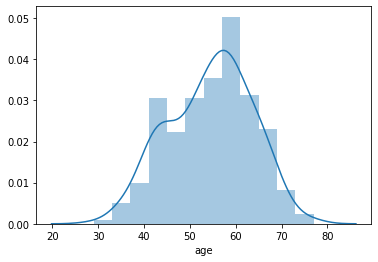

In [5]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='thalach'>

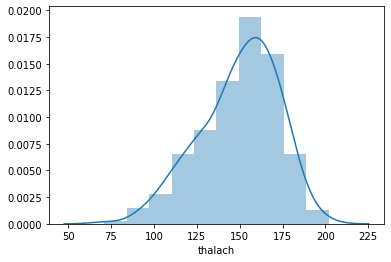

In [6]:
sns.distplot(df['thalach'], bins=10)

<AxesSubplot:xlabel='sex', ylabel='count'>

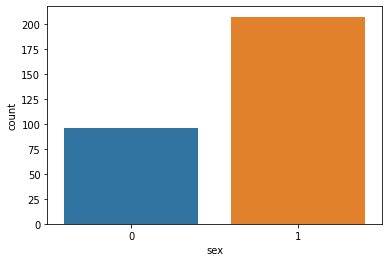

In [7]:
sns.countplot(x='sex',data=df,)

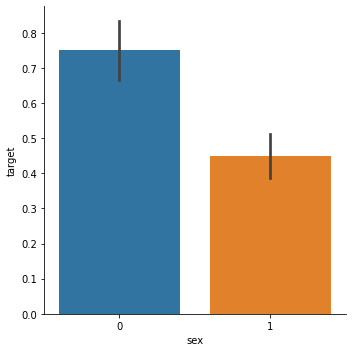

In [9]:
sns.catplot(data=df, kind='bar',x='sex',y='target')

<AxesSubplot:xlabel='target', ylabel='count'>

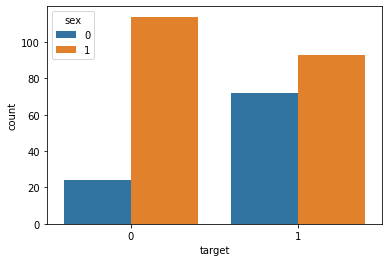

In [10]:
sns.countplot(x='target',data=df,hue='sex')

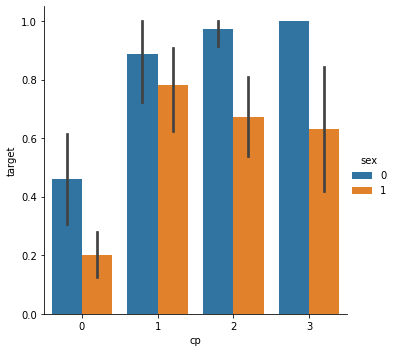

In [11]:
sns.catplot(data=df, kind='bar',x='cp',y='target',hue='sex')

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [14]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df[(df['thalach']==173) & (df['trestbps']==138)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


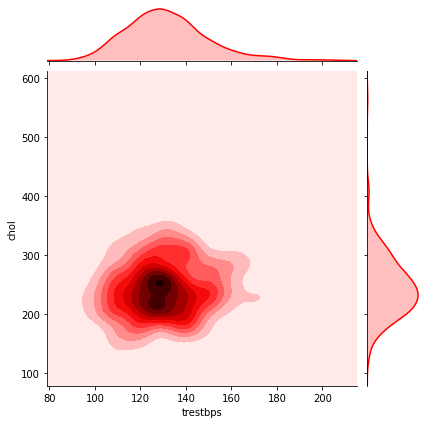

In [16]:
sns.jointplot(x='trestbps',y='chol',data=df,color='red',kind='kde')

<AxesSubplot:xlabel='sex', ylabel='trestbps'>

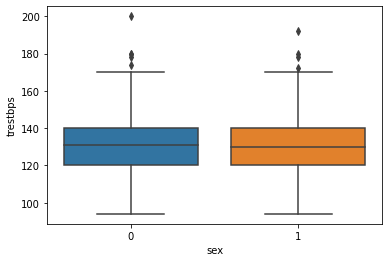

In [17]:
sns.boxplot(y='trestbps',data=df, x='sex')

<AxesSubplot:xlabel='sex', ylabel='trestbps'>

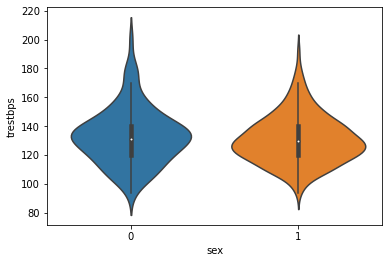

In [18]:
sns.violinplot(data=df, y='trestbps', x='sex')

<AxesSubplot:xlabel='sex', ylabel='chol'>

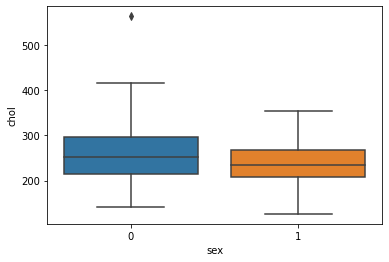

In [19]:
sns.boxplot(y='chol',data=df, x='sex')

# Logistic regression
## Training model set up
#### Step 1: defining X values (entry variables) and y (target value)

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

#### Step 2: splitting data into train- and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### step 3: creating logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()

In [17]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### step 4: Now training the model with the training data

In [18]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and evaluations
#### step 1: Using the test data to create a set of predictions

In [19]:
predictions = logmodel.predict(X_test)

#### step 2: creating a report on how well the model performed with the test data

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        38
           1       0.81      0.89      0.85        53

    accuracy                           0.81        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.81      0.81        91



#### The model predicts correct with a probability of 81%, which is not bad but also not very precise

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test, predictions))

[[27 11]
 [ 6 47]]


#### To be continued...

In [ ]:
predict_test = logmodel.predict()

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
patient_x = [60,1,4,150,240,1,2,180,0,3.1,0,0,6]

In [38]:
patient_x = np.array(patient_x).reshape(1,(len(patient_x)))

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
import numpy as np

In [39]:
prediction_patient_x = logmodel.predict(patient_x)

In [37]:
patient_x

array([[ 60. ],
       [  1. ],
       [  4. ],
       [150. ],
       [240. ],
       [  1. ],
       [  2. ],
       [180. ],
       [  0. ],
       [  3.1],
       [  0. ],
       [  0. ],
       [  6. ]])

In [41]:
prediction_patient_x

array([1], dtype=int64)

In [46]:
prediction_patient_x

<function ndarray.getfield>

In [47]:
print(prediction_patient_x)

[1]
